<a href="https://colab.research.google.com/github/nicoavilan/QAI-Summer-School/blob/main/S9_Quantum_Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q-AI: Summer School on Quantum Artificial Intelligence**

Universidad del Rosario - School of Science and Engineering

Université du Québec à Trois-Rivières (UQTR), Canada

**Fundamentals of Quantum Computing** (session 9)



Professor: [Nicolás Avilán Vargas](http://www.linkedin.com/in/nicoavilanv)

nicolasg.avilan@urosario.edu.co

# **Fundamentals of Quantum Computing (session 9)**




This guide on Quantum Teleportation for undergraduates explains entanglement, Bell states, and the teleportation protocol using linear algebra and Dirac notation. It includes Qiskit 2.1.1 code for Google Colab, visualizations of entangled states and circuits, and exercises to explore information flow.

## **Quantum Teleportation**

Quantum teleportation is a protocol that transfers the quantum state of a qubit from one location to another without physically moving the qubit, using quantum entanglement and classical communication.




## **Conceptual Foundations**

**Quantum Entanglement and Bell States**

Quantum teleportation relies on entanglement, where two or more qubits share a quantum state such that their properties are correlated. The Bell state used in teleportation is:
$$|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$$

In the literature, some times, these states are considered units of entanglement, then they are called **e-bits**.

In matrix form (for qubits $A$ and $B$):

$$|\Phi^+\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1 \end{pmatrix}$$

Remember, this state is created by applying a Hadamard gate ($H$) to qubit $A$, followed by a CNOT gate with $A$ as control and $B$ as target.

teleportation-time-steps.svg

**Teleportation Protocol**

Quantum teleportation transfers the state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$ of Alice's qubit ($q_0$) to Bob's qubit ($q_2$) using:

* An entangled pair ($|\Phi^+\rangle$) shared between Alice ($q_1$) and Bob ($q_2$).
* Two classical bits for communication.
* Three qubits: $q_0$ (state to teleport), $q_1$ (Alice's entangled qubit), $q_2$ (Bob's entangled qubit).

**Steps**:
1. Prepare $|\psi\rangle$ on $q_0$.
2. Create $|\Phi^+\rangle$ between $q_1$ and $q_2$.
3. Alice performs a Bell measurement on $q_0$ and $q_1$, collapsing their state to one of four Bell states and sending two classical bits to Bob.

Bob applies conditional gates (( X ), ( Z )) based on the classical bits to recover ( |\psi\rangle ) on ( q_2 ).

**Mathematical Description**

Initial state:
$$|\psi\rangle \otimes |\Phi^+\rangle = (\alpha |0\rangle + \beta |1\rangle){q_0} \otimes \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle){q_1 q_2}$$

After Alice's Bell measurement (CNOT and ( H ), followed by measurement), the state projects onto one of:

$$|00\rangle, |01\rangle, |10\rangle, |11\rangle$$

Bob's qubit $q_2$ becomes:

$00$: $\alpha |0\rangle + \beta |1\rangle$ (no correction).

$01$: $\alpha |1\rangle + \beta |0\rangle$ (apply $X$).

$10$: $\alpha |0\rangle - \beta |1\rangle$ (apply $Z$).

$11$: $\alpha |1\rangle - \beta |0\rangle$ (apply $X$, then $Z$).

Bob applies Pauli corrections based on the classical bits, recovering $|\psi\rangle$.

**Quantum vs. Classical Information**


*Quantum Information*: The state $|\psi\rangle$ is transferred via entanglement, not physically.

*Classical Information*: Two bits communicate Alice's measurement outcome.

The no-cloning theorem ensures $|\psi\rangle$ is destroyed at Alice's end.

## **Qiskit implementation**

In [1]:
%pip install qiskit --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 2.8 MB/s eta 0:00:00


In [2]:
%pip install pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
%pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 60.4 MB/s eta 0:00:00


This guide is compatible with Qiskit version 2.1.1

In [4]:
import qiskit
print(qiskit.__version__)

2.1.1


Import Qiskit modules

In [5]:
# Import libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
import numpy as np
import plotly.graph_objects as go

* `QuantumRegister` is used to create a set of qubits that can then be used within a quantum circuit.
* `ClassicalRegister` is used to create a set of clasical bits that can then be used within a quantum circuit.

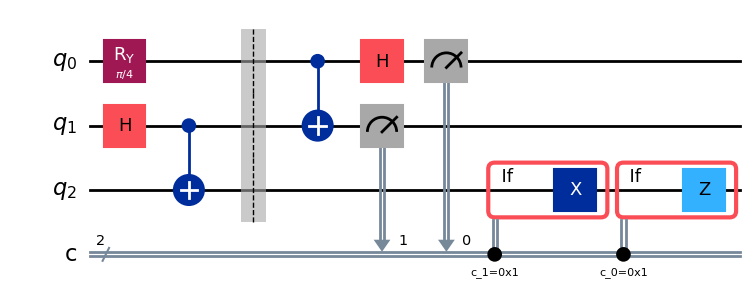

In [6]:
# Create circuit
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qr, cr)
# Step 1: Prepare state |ψ⟩ = cos(π/8)|0⟩ + sin(π/8)|1⟩ on q0
theta = np.pi/4
qc.ry(theta, 0)
# Step 2: Create Bell state |Φ⁺⟩ on q1, q2
qc.h(1)
qc.cx(1, 2)
qc.barrier()
# Step 3: Alice's Bell measurement
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])
# Step 4: Bob's corrections

# Bob uses the classical bits to conditionally apply gates
with qc.if_test((cr[1], 1)):
    qc.x(2)
with qc.if_test((cr[0], 1)):
    qc.z(2)

display(qc.draw(output="mpl"))

In [7]:
# Simulate statevector
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(2, 'c')
qc_state = QuantumCircuit(qr, cr)
qc_state.ry(theta, 0)
state0 = Statevector.from_instruction(qc_state)
state0.draw('latex')

<IPython.core.display.Latex object>

In [8]:
qc_state.h(1)
qc_state.cx(1, 2)
qc_state.cx(0, 1)
qc_state.h(0)
state_before = Statevector.from_instruction(qc_state)
qc_state.measure([0, 1], [0, 1])


with qc_state.if_test((cr[1], 1)):
    qc_state.x(2)
with qc_state.if_test((cr[0], 1)):
    qc_state.z(2)
qc.save_statevector()
#state_after = Statevector.from_instruction(qc_state)
# Simulate measurement
simulator = AerSimulator()

result = simulator.run(qc, shots=1000).result()
state_after = result.data(0)['statevector'] # Teleported state

counts = result.get_counts()


In [9]:
state_after.draw('latex')

<IPython.core.display.Latex object>

In [10]:
# Plot histogram
fig = go.Figure(data=[
    go.Bar(x=list(counts.keys()), y=list(counts.values()))
])
fig.update_layout(title="QAI Summer School - Teleportation Measurement Outcomes",
                  xaxis_title="Measurement (q0, q1)", yaxis_title="Counts")
fig.show()
# Plot statevector probabilities
basis = [format(i, '03b') for i in range(8)]
fig = go.Figure()
fig.add_trace(go.Bar(x=basis, y=np.abs(state0.data)**2, name="Before Corrections"))
fig.add_trace(go.Bar(x=basis, y=np.abs(state_after.data)**2, name="After Corrections"))
fig.update_layout(title="State Probabilities Before/After Bob’s Corrections",
                  xaxis_title="Basis State", yaxis_title="Probability", barmode='group')
fig.show()


# Additional Resources

* [IBM Quantum teleportation](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information/entanglement-in-action/quantum-teleportation)

To report errors or suggestions: nicolasg.avilan@urosario.edu.co